In [1]:
from squlearn.encoding_circuit.encoding_circuit_derivatives import *
from squlearn.util import Executor
from qiskit.primitives import Estimator, Sampler
from squlearn.kernel.matrix import FidelityKernel, ProjectedQuantumKernel
from scipy.optimize import minimize
from squlearn.encoding_circuit import *
import numpy as np
from matplotlib import pyplot as plt



In [2]:

####################333
def rbf_fun(x,y,sigma=1):
    return np.exp(-(x-y)**2/(2*sigma**2))

def rbf_kernel_manual(x, y, sigma=1):
    kernel = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            kernel[i, j] = rbf_fun(x[i], y[j], sigma)
    return kernel

def analytical_derivative_rbf_kernel(x, y, sigma=1):
    derivative = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            derivative[i, j] = -rbf_fun(x[i], y[j], sigma) * (2*(x[i]-y[j])/(2*sigma**2))
    return derivative


In [3]:
def f_alpha_0(alpha_, kernel_order_0):
    """

    Parameters:
    - alpha: The vector of alphas, of shape (len(x_span)+1, 1).
    - kernel_tensor: a
    - initial_conditions: Initial values for the dependent variables.
    Returns:
    - f_alphas: The vector of f_alphas, of shape (len(x_span), 1).
    """
    b = alpha_[0]
    alpha = alpha_[1:]
    return b + kernel_order_0 @ alpha

def f_alpha_1(alpha_, kernel_order_1):
    """
    Parameters:
    - alpha: The vector of alphas, of shape (len(x_span)+1, 1).
    - kernel_tensor: a
    - initial_conditions: Initial values for the dependent variables.
    Returns:
    - f_alphas: The vector of f_alphas, of shape (len(x_span), 1). of the first order derivative
    """
    alpha = alpha_[1:]
    return  kernel_order_1 @ alpha
def g(f, x):
    lamb  = 20
    k = 0.1
    return -lamb*np.exp(-lamb*x*k)*np.sin(lamb*x) - lamb*k*f

def loss_function(alpha_, f_initial,regularization_parameter, x_span, kernel_order_0, kernel_order_1):
    print("shapes")
    print("x_span", x_span.shape)
    print("kernel_order_0", kernel_order_0.shape)
    print("kernel_order_1", kernel_order_1.shape)
    print("alpha_", alpha_.shape)

    alpha = alpha_#[1:]
    sum1 = np.sum((f_alpha_1(alpha, kernel_order_1)-g(f_alpha_0(alpha, kernel_order_0), x_span))**2)
    sum2 = (f_alpha_0(alpha, kernel_order_0)[0]-f_initial)**2
    L =  sum2 + sum1*regularization_parameter
    print(L)
    return L


def solve(x_span, kernel_tensor, loss_function, f_initial):
    """
    Solve the differential equation using the specified method.

    Returns:
    - solution: The solution of the differential equation.
    """
    # Get the kernel object
    
    regularization_parameter = 1
    alpha_0 = np.ones(len(x_span)+1)
    result = minimize(loss_function, alpha_0, 
                args = (f_initial, regularization_parameter, x_span, kernel_tensor[0], kernel_tensor[1]),
                options={'disp': True, 'maxiter':10000})

    optimal_alpha = result.x #optimal_alpha = [b, alpha_1, alpha_2, ...]
    # Evaluate the solution
    solution = f_alpha_0(optimal_alpha, kernel_tensor[0])
    
    
    return solution, optimal_alpha

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


x_span = np.linspace(0, 1, 100)

kernel_list = np.array([rbf_kernel_manual(x_span, x_span, sigma=0.2), analytical_derivative_rbf_kernel(x_span, x_span, sigma=0.2)])

f_initial = 1
#insert x_initial in x_span

solution, optimal_alpha = solve(x_span, kernel_list, loss_function, f_initial)

shapes
x_span (100,)
kernel_order_0 (100, 100)
kernel_order_1 (100, 100)
alpha_ (101,)
1133617.8188679721
shapes
x_span (100,)
kernel_order_0 (100, 100)
kernel_order_1 (100, 100)
alpha_ (101,)
1133617.81938435
shapes
x_span (100,)
kernel_order_0 (100, 100)
kernel_order_1 (100, 100)
alpha_ (101,)
1133617.8186966504
shapes
x_span (100,)
kernel_order_0 (100, 100)
kernel_order_1 (100, 100)
alpha_ (101,)
1133617.818710753
shapes
x_span (100,)
kernel_order_0 (100, 100)
kernel_order_1 (100, 100)
alpha_ (101,)
1133617.818726001
shapes
x_span (100,)
kernel_order_0 (100, 100)
kernel_order_1 (100, 100)
alpha_ (101,)
1133617.8187423344
shapes
x_span (100,)
kernel_order_0 (100, 100)
kernel_order_1 (100, 100)
alpha_ (101,)
1133617.818759684
shapes
x_span (100,)
kernel_order_0 (100, 100)
kernel_order_1 (100, 100)
alpha_ (101,)
1133617.8187779724
shapes
x_span (100,)
kernel_order_0 (100, 100)
kernel_order_1 (100, 100)
alpha_ (101,)
1133617.8187971164
shapes
x_span (100,)
kernel_order_0 (100, 100)
kern

In [5]:
optimal_alpha

array([   27.12787216,  -833.17652561,  1469.90710634,   207.65068267,
       -1297.339092  ,  -634.79432247,   919.03325227,  1053.72884787,
        -268.8454763 , -1210.0874307 ,  -289.92668215,   836.53630989,
         741.2797526 ,  -395.1665844 ,  -852.8963252 ,   -47.07751635,
         783.15761221,   361.85102815,  -782.12486908,  -473.98185226,
        1098.17057261,  -484.69379869])

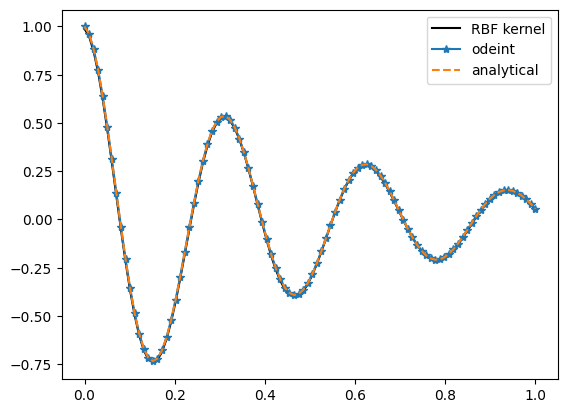

In [15]:
plt.plot(x_span[:], solution, c= "black", label='RBF kernel')

def f_analytical(x):
    lamb  = 20
    k = 0.1
    return np.exp(-lamb*x*k)*np.cos(lamb*x)

f_values = odeint(g, f_initial, x_span[:])

plt.plot(x_span[:], f_values, '*-', label='odeint')
plt.plot(x_span[:], f_analytical(x_span[:]), '--', label='analytical')

plt.legend()

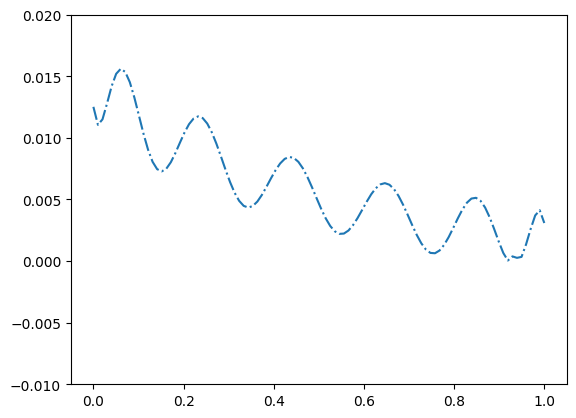

In [18]:
#plot error of solution and odeint
plt.ylim(-0.01, 0.02)
plt.plot(x_span, np.abs(solution-f_analytical(x_span)), '-.')